# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
# import random
import re
# import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [3]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [7]:
#your code
html = requests.get(url).content
soup_github = BeautifulSoup(html, "html.parser")
soup_github


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-0adfa28f0e68.c

In [21]:
type(soup_github)

bs4.BeautifulSoup

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [174]:
#your code
table_github=soup_github.find_all('h1', {'class':'h3'})
print(table_github)

[<h1 class="h3 lh-condensed">
<a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":6942,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="ae4d88ee5e13d3dde068e007ac82a7f833337ff5f2c845dc36a8c6dfc69b5b19" data-view-component="true" href="/twpayne">
            Tom Payne
</a> </h1>, <h1 class="h3 lh-condensed">
<a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":7413593,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="5a21d82b36cbfc270fd68532b88d06a8c190622662a84592756a6bcc97b46142" data-view-component="true" href="/a8m">
            Ariel Mashraki
</a> </h1>, <h1 class="h3 lh-condense

In [268]:
users = []
for i in range(len(table_github)):
    pattern='"/[A-Za-z0-9].*'
    user=re.findall(pattern,str(table_github[i]))
    clean_user = re.sub(r'[/\"\'\[\]>]', "", str(user))
    name = list(str(table_github[i]).partition(clean_user+'">'))
    clean_name = re.sub(r'[\n]',"",name[-1]).replace('</a> </h1>','').lstrip()
    users.append(clean_user+' ('+clean_name+')')
users

['twpayne (Tom Payne)',
 'a8m (Ariel Mashraki)',
 'geohot (George Hotz)',
 'charliermarsh (Charlie Marsh)',
 'klauspost (Klaus Post)',
 'rusty1s (Matthias Fey)',
 'keith (Keith Smiley)',
 'dgtlmoon (dgtlmoon)',
 'faddat (Jacob Gadikian)',
 'ijjk (JJ Kasper)',
 'AliSoftware (Olivier Halligon)',
 'benbjohnson (Ben Johnson)',
 'kishikawakatsumi (Kishikawa Katsumi)',
 'bradfitz (Brad Fitzpatrick)',
 'shahednasser (Shahed Nasser)',
 'Rich-Harris (Rich Harris)',
 'phuocng (phuocng)',
 'mwaskom (Michael Waskom)',
 'FiloSottile (Filippo Valsorda)',
 'marten-seemann (Marten Seemann)',
 'azure-sdk (Azure SDK Bot)',
 'mauritsvanrees (Maurits van Rees)',
 'unknwon (Joe Chen)',
 'susanev (susan evans)',
 'fingolfin (Max Horn)']

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [74]:
# This is the url you will scrape in this exercise
urlrepo = 'https://github.com/trending/python?since=daily'

In [75]:
#your code
repos = requests.get(urlrepo)
repos_soup = BeautifulSoup(repos.text,'html.parser')
repos_soup


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-719f1193e0c0.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-0c343b529849.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-f22da508b62a.c

In [77]:
type(str(repos_soup))

str

In [39]:
table_repos = repos_soup.find_all('h1', {'class': 'h3'})
anchors = repos_soup.select('h1.h3 a')
hrefs = [a["href"] for a in repos_soup.select('h1.h3 a[href]')]
print(hrefs)



['/Anof-cyber/APTRS', '/Eilonh/s3crets_scanner', '/acantril/learn-cantrill-io-labs', '/PaddlePaddle/PaddleHub', '/facebookresearch/encodec', '/open-mmlab/mmdeploy', '/donnemartin/system-design-primer', '/yunjey/pytorch-tutorial', '/remzi-arpacidusseau/ostep-homework', '/TheKingOfDuck/fuzzDicts', '/geohot/tinygrad', '/andyzys/jd_seckill', '/PaddlePaddle/PaddleClas', '/open-mmlab/mmsegmentation', '/facebookresearch/detectron2', '/hhyo/Archery', '/DeepLabCut/DeepLabCut', '/minimaxir/big-list-of-naughty-strings', '/hiroi-sora/Umi-OCR', '/jackfrued/Python-100-Days', '/microsoft/recommenders', '/SigmaHQ/sigma', '/jindongwang/transferlearning', '/KurtBestor/Hitomi-Downloader', '/open-mmlab/mmdetection']


In [44]:
trending_repos = []
for i in range(len(hrefs)):
    repo = hrefs[i].split('/')
    trending_repos.append(repo[-1])
print(trending_repos)

['APTRS', 's3crets_scanner', 'learn-cantrill-io-labs', 'PaddleHub', 'encodec', 'mmdeploy', 'system-design-primer', 'pytorch-tutorial', 'ostep-homework', 'fuzzDicts', 'tinygrad', 'jd_seckill', 'PaddleClas', 'mmsegmentation', 'detectron2', 'Archery', 'DeepLabCut', 'big-list-of-naughty-strings', 'Umi-OCR', 'Python-100-Days', 'recommenders', 'sigma', 'transferlearning', 'Hitomi-Downloader', 'mmdetection']


#### Display all the image links from Walt Disney wikipedia page

In [70]:
# This is the url you will scrape in this exercise
urldisney = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [71]:
#your code
#Run on Colab because Wikipedia gives SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Walt_Disney (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
disney = requests.get(urldisney) 
disney_soup = BeautifulSoup(disney.text,'html.parser')
table_disney = disney_soup.find_all('a' , {'class':'image'})
#print(table_disney)
hrefs_disney = [a['href'] for a in disney_soup.select('a.image')]
print(hrefs_disney)

SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Walt_Disney (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

In [12]:
#Result from Colab:
hrefs_disney=['/wiki/File:Walt_Disney_1946.JPG', '/wiki/File:Walt_Disney_1942_signature.svg', '/wiki/File:Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg', '/wiki/File:Walt_Disney_envelope_ca._1921.jpg', '/wiki/File:Trolley_Troubles_poster.jpg', '/wiki/File:Steamboat-willie.jpg', '/wiki/File:Walt_Disney_1935.jpg', '/wiki/File:Walt_Disney_Snow_white_1937_trailer_screenshot_(13).jpg', '/wiki/File:Disney_drawing_goofy.jpg', '/wiki/File:WaltDisneyplansDisneylandDec1954.jpg', '/wiki/File:Walt_disney_portrait_right.jpg', '/wiki/File:Walt_Disney_Grave.JPG', '/wiki/File:Roy_O._Disney_with_Company_at_Press_Conference.jpg', '/wiki/File:DisneySchiphol1951.jpg', '/wiki/File:Disney1968.jpg', '/wiki/File:Disney_Oscar_1953_(cropped).jpg', '/wiki/File:Disneyland_Resort_logo.svg', '/wiki/File:Animation_disc.svg', '/wiki/File:Magic_Kingdom_castle.jpg', '/wiki/File:Blank_television_set.svg']
#print(hrefs_disney)
links_walt_disney = []
for i in range(len(hrefs_disney)):
    full_link = 'https://en.wikipedia.org/'+(hrefs_disney[i])
    links_walt_disney.append(full_link)
print(links_walt_disney)

['https://en.wikipedia.org//wiki/File:Walt_Disney_1946.JPG', 'https://en.wikipedia.org//wiki/File:Walt_Disney_1942_signature.svg', 'https://en.wikipedia.org//wiki/File:Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg', 'https://en.wikipedia.org//wiki/File:Walt_Disney_envelope_ca._1921.jpg', 'https://en.wikipedia.org//wiki/File:Trolley_Troubles_poster.jpg', 'https://en.wikipedia.org//wiki/File:Steamboat-willie.jpg', 'https://en.wikipedia.org//wiki/File:Walt_Disney_1935.jpg', 'https://en.wikipedia.org//wiki/File:Walt_Disney_Snow_white_1937_trailer_screenshot_(13).jpg', 'https://en.wikipedia.org//wiki/File:Disney_drawing_goofy.jpg', 'https://en.wikipedia.org//wiki/File:WaltDisneyplansDisneylandDec1954.jpg', 'https://en.wikipedia.org//wiki/File:Walt_disney_portrait_right.jpg', 'https://en.wikipedia.org//wiki/File:Walt_Disney_Grave.JPG', 'https://en.wikipedia.org//wiki/File:Roy_O._Disney_with_Company_at_Press_Conference.jpg', 'https://en.wikipedia.org//wiki/File:DisneySchiphol19

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [62]:
# This is the url you will scrape in this exercise
python_url ='https://es.wikipedia.org/wiki/Python'

In [63]:
#your code
#Run on Colab because Wikipedia won't accept the connection from Jupyter
pythons = requests.get(python_url)
python_soup = BeautifulSoup(pythons.content,'html.parser')
table_python = python_soup.find_all('a')
# anchors = python_soup.select('a.href')
hrefs = [a['href'] for a in python_soup.select('a[href]')]
print(hrefs)

SSLError: HTTPSConnectionPool(host='es.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Python (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

In [13]:
#Result from Colab
hrefs = ['#mw-head', '#searchInput', '/wiki/Monty_Python', '/wiki/Colt_Python', '/wiki/Pythonidae', '/wiki/Pit%C3%B3n', '/wiki/Archivo:Python-logo-notext.svg', '/wiki/Python_Software_Foundation', 'https://www.python.org/', '/wiki/Extensi%C3%B3n_de_archivo', '/wiki/Paradigma_de_programaci%C3%B3n', '/w/index.php?title=Lenguaje_de_programaci%C3%B3n_multiparadigma&action=edit&redlink=1', '/wiki/Programaci%C3%B3n_orientada_a_objetos', '/wiki/Programaci%C3%B3n_imperativa', '/wiki/Programaci%C3%B3n_funcional', '/wiki/Reflexi%C3%B3n_(inform%C3%A1tica)', '/wiki/Guido_van_Rossum', '#cite_note-1', '/wiki/Sistema_de_tipos', '/wiki/Tipado_fuerte', '/wiki/Tipado_din%C3%A1mico', '/wiki/CPython', '/wiki/IronPython', '/wiki/Jython', '/wiki/PyPy', '/w/index.php?title=ActivePython&action=edit&redlink=1', '/w/index.php?title=Stackless_Python&action=edit&redlink=1', '/wiki/RPython', '/wiki/ABC_(lenguaje_de_programaci%C3%B3n)', '/wiki/C_(lenguaje_de_programaci%C3%B3n)', '/wiki/Haskell', '/wiki/Icon', '/wiki/Lisp', '/wiki/Modula-3', '/wiki/Perl', '/wiki/Smalltalk', '/wiki/Java_(lenguaje_de_programaci%C3%B3n)', '/wiki/Boo_(lenguaje_de_programaci%C3%B3n)', '/wiki/D_(lenguaje_de_programaci%C3%B3n)', '/wiki/Falcon_(lenguaje_de_programaci%C3%B3n)', '/wiki/Genie_(lenguaje_de_programaci%C3%B3n)', '/wiki/Groovy_(lenguaje_de_programaci%C3%B3n)', '/wiki/Ruby', '/wiki/JavaScript', '/wiki/Cython', '/wiki/Go_(lenguaje_de_programaci%C3%B3n)', '/wiki/Latino_(Lenguaje_de_Programaci%C3%B3n)', '/wiki/Sistema_operativo', '/wiki/Multiplataforma', '/wiki/Licencia_de_software', '/wiki/Python_Software_Foundation_License', 'https://www.wikidata.org/wiki/Q28865', '/wiki/Lenguaje_de_programaci%C3%B3n', '/wiki/Int%C3%A9rprete_(inform%C3%A1tica)', '/wiki/Codigo_fuente', '/wiki/Instagram', '/wiki/Netflix', '/wiki/Spotify', '/w/index.php?title=Panda_3D&action=edit&redlink=1', '#cite_note-Glosario_LUCA,_2020-2', '/wiki/Lenguaje_de_programaci%C3%B3n#Paradigma_de_programación', '/wiki/Programaci%C3%B3n_orientada_a_objetos', '/wiki/Wikipedia:Palabras_que_evitar#Hay_quien_dice,_se_dice_que,_muchos_creen_que', '/wiki/Programaci%C3%B3n_funcional', '/wiki/Lenguaje_de_programaci%C3%B3n_interpretado', '/wiki/Tipado_din%C3%A1mico', '/wiki/Multiplataforma', '/wiki/Python_Software_Foundation', '/wiki/Licencia_de_software', '/wiki/C%C3%B3digo_abierto', '/wiki/Python_Software_Foundation_License', '#cite_note-lib-history-3', '#Historia', '#Características_y_paradigmas', '#Filosofía', '#Modo_interactivo', '#Elementos_del_lenguaje_y_sintaxis', '#Comentarios', '#Variables', '#Tipos_de_datos', '#Condicionales', '#Bucle_for', '#Bucle_while', '#Listas_y_Tuplas', '#Diccionarios', '#Sentencia_Switch_Case', '#Usando_if,_elif,_else', '#Usando_diccionario', '#Conjuntos', '#Listas_por_comprensión', '#Funciones', '#Clases', '#Módulos', '#Instalación_de_módulos_(pip)', '#Interfaz_al_sistema_operativo', '#Comodines_de_archivos', '#Argumentos_de_línea_de_órdenes', '#Matemática', '#Fechas_y_Tiempos', '#Módulo_Turtle', '#Sistema_de_objetos', '#Biblioteca_estándar', '#Implementaciones', '#Incidencias', '#Véase_también', '#Referencias', '#Bibliografía', '#Enlaces_externos', '/w/index.php?title=Python&action=edit&section=1', '/wiki/Historia_de_Python', '/wiki/Archivo:Guido_van_Rossum_OSCON_2006.jpg', '/wiki/Archivo:Guido_van_Rossum_OSCON_2006.jpg', '/wiki/Guido_van_Rossum', '#cite_note-venners-interview-pt-1-4', '/wiki/Guido_van_Rossum', '/w/index.php?title=Centrum_Wiskunde_%26_Informatica&action=edit&redlink=1', '/wiki/Pa%C3%ADses_Bajos', '/wiki/Lenguaje_de_programaci%C3%B3n_ABC', '/wiki/Manejo_de_excepciones', '/wiki/Amoeba_(Inform%C3%A1tica)', '#cite_note-whycreated-5', '/wiki/Humorista', '/wiki/Monty_Python', '#cite_note-6', '/wiki/Benevolent_Dictator_for_Life', '#cite_note-7', '#cite_note-8', 'news:alt.sources', '#cite_note-9', '/wiki/Herencia_(inform%C3%A1tica)', '/wiki/Subrutina', '/wiki/Modula-3', '#cite_note-venners-interview-pt-1-4', '#cite_note-whycreated-5', 'news:comp.lang.python', '/wiki/Programaci%C3%B3n_funcional', '/wiki/C%C3%A1lculo_lambda', '#cite_note-10', '/wiki/Lisp', '#cite_note-11', 'https://en.wikipedia.org/wiki/Corporation_for_National_Research_Initiatives', '/wiki/Virginia', '/wiki/Software', '/wiki/DARPA', '#cite_note-12', '#cite_note-13', '/w/index.php?title=BeOpen.com&action=edit&redlink=1', '/w/index.php?title=PythonLabs&action=edit&redlink=1', '#cite_note-newin-2.0-14', '/w/index.php?title=Digital_Creations&action=edit&redlink=1', '/wiki/Programaci%C3%B3n_funcional', '/wiki/Haskell', '/wiki/Recolecci%C3%B3n_de_basura', '#cite_note-newin-2.0-14', '/wiki/GNU_General_Public_License', '/wiki/Python_License', '/wiki/Virginia', '/wiki/Free_Software_Foundation', '/wiki/Python_Software_Foundation_License', '/wiki/FSF_Award_for_the_Advancement_of_Free_Software', '/wiki/Archivo:Python_add5_syntax.svg', '/wiki/Archivo:Python_add5_syntax.svg', '/wiki/Coloreado_de_sintaxis', '/wiki/Python_Software_Foundation', '/wiki/Apache_Software_Foundation', '#cite_note-lib-history-3', '/w/index.php?title=Static_scoping&action=edit&redlink=1', '/wiki/Scheme', '#cite_note-15', '#cite_note-16', '/wiki/Generador_(inform%C3%A1tica)', '/wiki/Icon', '#cite_note-17', '/wiki/Lenguaje_de_programaci%C3%B3n_Java', '#cite_note-18', '/wiki/Log4j', '/wiki/Simple_API_for_XML', '#cite_note-19', '#cite_note-20', '#cite_note-21', '#cite_note-22', '/wiki/Inteligencia_artificial', '/wiki/Machine_learning', '#cite_note-23', '/w/index.php?title=Python&action=edit&section=2', '/wiki/Lenguaje_de_programaci%C3%B3n#Paradigma_de_programación', '/wiki/Programaci%C3%B3n_orientada_a_objetos', '/wiki/Lenguaje_de_programaci%C3%B3n#Clasificación_por_paradigmas', '/wiki/Programaci%C3%B3n_funcional', '/wiki/Tipado_din%C3%A1mico', '/wiki/Conteo_de_referencias', '/wiki/Gesti%C3%B3n_de_memoria', '/wiki/Variable_(programaci%C3%B3n)', '/wiki/C_(lenguaje_de_programaci%C3%B3n)', '/wiki/C%2B%2B', '/wiki/Lisp', '/wiki/Scheme', '/w/index.php?title=Python&action=edit&section=3', '/wiki/Unix', '/wiki/Tim_Peters', '/wiki/Zen_de_Python', '#cite_note-24', '/wiki/Tim_Peters', '/wiki/Zen_de_Python', '/wiki/Huevo_de_pascua_(virtual)', '#cite_note-25', '/wiki/Archivo:LAMP_software_bundle.svg', '/wiki/Archivo:LAMP_software_bundle.svg', '/wiki/LAMP', '/wiki/Squid_(programa)', '/w/index.php?title=Python&action=edit&section=4', '/wiki/Int%C3%A9rprete_de_comandos', '/wiki/IDLE', 'http://bpython-interpreter.org/', '/wiki/IPython', '#cite_note-26', '/wiki/Coloreado_de_sintaxis', '/w/index.php?title=Python&action=edit&section=5', '/wiki/Pascal_(lenguaje_de_programaci%C3%B3n)', '/wiki/COBOL', '/wiki/Indentaci%C3%B3n', '#cite_note-27', '#cite_note-28', '#cite_note-29', '#cite_note-30', '/wiki/Factorial', '/wiki/Lenguaje_de_programaci%C3%B3n_C', '/wiki/Factorial', '/w/index.php?title=Python&action=edit&section=6', '/w/index.php?title=Python&action=edit&section=7', '/wiki/Tipado_din%C3%A1mico', '#cite_note-Green_Tea_Press,_2002-31', '/w/index.php?title=Python&action=edit&section=8', '/wiki/Archivo:Python_3._The_standard_type_hierarchy.png', '/wiki/Archivo:Python_3._The_standard_type_hierarchy.png', '/wiki/Unicode', '/w/index.php?title=Python&action=edit&section=9', '/wiki/Sentencia_condicional', '/wiki/Bloque_de_c%C3%B3digo', '/w/index.php?title=Python&action=edit&section=10', '/wiki/Bucle_for#Bucle_Por_Cada_(For_Each)', '/w/index.php?title=Python&action=edit&section=11', '/wiki/Bucle_while', '/w/index.php?title=Python&action=edit&section=12', '/w/index.php?title=Python&action=edit&section=13', '/w/index.php?title=Python&action=edit&section=14', 'https://www.python.org/dev/peps/pep-0636/', '/w/index.php?title=Python&action=edit&section=15', '/w/index.php?title=Python&action=edit&section=16', '/w/index.php?title=Python&action=edit&section=17', '/wiki/Intersecci%C3%B3n_de_conjuntos', '/wiki/Uni%C3%B3n_de_conjuntos', '/wiki/Diferencia_de_conjuntos', '/wiki/Diferencia_sim%C3%A9trica', '/w/index.php?title=Python&action=edit&section=18', '/w/index.php?title=Python&action=edit&section=19', '/wiki/Lisp', '/w/index.php?title=Python&action=edit&section=20', '/wiki/Herencia_m%C3%BAltiple', '/wiki/Clase_(inform%C3%A1tica)', '#cite_note-Recuero,_2020-32', '#cite_note-33', '/w/index.php?title=Python&action=edit&section=21', '/wiki/Tkinter', '#cite_note-34', '/wiki/Tk', '#cite_note-35', '/w/index.php?title=Python&action=edit&section=22', '/wiki/Software', '/wiki/Pip_(administrador_de_paquetes)', '/w/index.php?title=Python&action=edit&section=23', '/w/index.php?title=Python&action=edit&section=24', '/w/index.php?title=Python&action=edit&section=25', '/w/index.php?title=Python&action=edit&section=26', '/w/index.php?title=Python&action=edit&section=27', '/w/index.php?title=Python&action=edit&section=28', '/wiki/Gr%C3%A1ficas_tortuga', '/w/index.php?title=Python&action=edit&section=29', '/wiki/Clase_(inform%C3%A1tica)', '/wiki/Metaclase', '/wiki/Herencia_m%C3%BAltiple', '/wiki/Polimorfismo_(inform%C3%A1tica)', '/w/index.php?title=Python&action=edit&section=30', '/wiki/Archivo:Python_batteries_included.jpg', '/wiki/Archivo:Python_batteries_included.jpg', '#cite_note-36', '/w/index.php?title=Python&action=edit&section=31', '/wiki/CPython', '/wiki/IronPython', '/w/index.php?title=Stackless_Python&action=edit&redlink=1', '/wiki/Lenguaje_de_programaci%C3%B3n_C', 'http://www.stackless.com/', '/wiki/Jython', '/wiki/Lenguaje_de_programaci%C3%B3n_Java', '/w/index.php?title=Pippy&action=edit&redlink=1', 'http://pippy.sourceforge.net/', '/wiki/PyPy', '/wiki/Compilaci%C3%B3n_en_tiempo_de_ejecuci%C3%B3n', 'http://pypy.org/', '/w/index.php?title=ActivePython&action=edit&redlink=1', '/w/index.php?title=Python&action=edit&section=32', '#cite_note-37', '#cite_note-38', '#cite_note-39', '#cite_note-40', '/wiki/Windows_10', '#cite_note-41', '/w/index.php?title=Python&action=edit&section=33', '/wiki/PyPI', '/wiki/Django_(framework)', '/wiki/Cython', '/wiki/Flask', '/wiki/CubicWeb', '/wiki/Pygame', '/wiki/Tkinter', '/wiki/Binding', '/wiki/Biblioteca_(programaci%C3%B3n)', '/wiki/GUI', '/wiki/Tcl/Tk', '/wiki/PyGTK', '/wiki/Binding', '/wiki/Biblioteca_(programaci%C3%B3n)', '/wiki/GUI', '/wiki/GTK', '/wiki/WxPython', '/wiki/Binding', '/wiki/Biblioteca_(programaci%C3%B3n)', '/wiki/GUI', '/wiki/WxWidgets', '/wiki/PyQt', '/wiki/Binding', '/wiki/Biblioteca_(programaci%C3%B3n)', '/wiki/GUI', '/wiki/Qt_(biblioteca)', '/wiki/PySide', '/wiki/Binding', '/wiki/Biblioteca_(programaci%C3%B3n)', '/wiki/GUI', '/wiki/Qt_(biblioteca)', '/wiki/Nokia', '/wiki/Plone', '/wiki/Biopython', '/wiki/NumPy', '/wiki/SciPy', '/wiki/Pandas_(software)', '/wiki/Pyomo', '/wiki/Scikit-learn', '/wiki/Aprendizaje_autom%C3%A1tico', '/w/index.php?title=Python&action=edit&section=34', '#cite_ref-1', 'https://docs.python.org/3.11/whatsnew/changelog.html', '#cite_ref-Glosario_LUCA,_2020_2-0', 'https://web.archive.org/web/20200224120525/https://luca-d3.com/es/data-speaks/diccionario-tecnologico/python-lenguaje', '/wiki/Telef%C3%B3nica#Premios_y_reconocimientos', 'https://luca-d3.com/es/data-speaks/diccionario-tecnologico/python-lenguaje', '#cite_ref-lib-history_3-0', '#cite_ref-lib-history_3-1', 'https://docs.python.org/3/license.html', '#cite_ref-venners-interview-pt-1_4-0', '#cite_ref-venners-interview-pt-1_4-1', 'http://www.artima.com/intv/pythonP.html', '#cite_ref-whycreated_5-0', '#cite_ref-whycreated_5-1', 'https://docs.python.org/faq/general#why-was-python-created-in-the-first-place', '#cite_ref-6', 'https://docs.python.org/tutorial/appetite.html', '#cite_ref-7', 'https://web.archive.org/web/20180712235229/https://lamiradadelreplicante.com/2018/07/12/guido-van-rossum-dimite-como-lider-de-python/', 'https://lamiradadelreplicante.com/2018/07/12/guido-van-rossum-dimite-como-lider-de-python/', '#cite_ref-8', 'https://web.archive.org/web/20180712225051/https://www.mail-archive.com/python-committers@python.org/msg05628.html', 'https://www.mail-archive.com/python-committers@python.org/msg05628.html', '#cite_ref-9', '/wiki/Guido_van_Rossum', 'http://python-history.blogspot.com/2009/01/brief-timeline-of-python.html', '#cite_ref-10', '/wiki/ISBN', '/wiki/Especial:FuentesDeLibros/8426732437', '#cite_ref-11', 'http://www.artima.com/weblogs/viewpost.jsp?thread=98196', '#cite_ref-12', 'https://web.archive.org/web/20090223101648/http://python.org/doc/essays/cp4e.html', '#cite_ref-13', 'https://web.archive.org/web/20070312152257/http://www.python.org/cp4e/', '#cite_ref-newin-2.0_14-0', '#cite_ref-newin-2.0_14-1', 'https://web.archive.org/web/20070329043037/http://www.amk.ca/python/2.0/', '#cite_ref-15', 'https://www.python.org/dev/peps/pep-0227/', '#cite_ref-16', 'https://docs.python.org/whatsnew/2.2.html#peps-252-and-253-type-and-class-changes', '#cite_ref-17', 'https://docs.python.org/whatsnew/2.2.html#pep-255-simple-generators', '#cite_ref-18', 'https://www.python.org/dev/peps/pep-0282/', '#cite_ref-19', 'https://docs.python.org/library/threading.html', '#cite_ref-20', 'https://www.python.org/doc/sunset-python-2/', '#cite_ref-21', 'https://www.python.org/dev/peps/pep-0373/', '#cite_ref-22', 'https://devguide.python.org/#status-of-python-branches', '#cite_ref-23', 'https://www.edx.org/course/machine-learning-aprendizaje-automatico-con-python', '#cite_ref-24', '/wiki/Guido_van_Rossum', '/wiki/Pa%C3%ADses_Bajos', '#cite_ref-25', 'https://www.python.org/dev/peps/pep-0020/', '#cite_ref-26', 'https://web.archive.org/web/20180804135112/http://ipython.scipy.org/', 'http://ipython.scipy.org/', '#cite_ref-27', 'https://docs.python.org/2/tutorial/controlflow.html#defining-functions', '#cite_ref-28', 'https://web.archive.org/web/20150118141700/http://www.acm.uiuc.edu/webmonkeys/book/c_guide/index.html', 'http://www.acm.uiuc.edu/webmonkeys/book/c_guide/index.html', '#cite_ref-29', 'http://www.desarrolloweb.com/articulos/583.php', '#cite_ref-30', 'https://web.archive.org/web/20140527204143/http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html#whitespace-1', 'http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html#whitespace-1', '#cite_ref-Green_Tea_Press,_2002_31-0', 'https://web.archive.org/web/20171023174011/https://argentinaenpython.com/quiero-aprender-python/aprenda-a-pensar-como-un-programador-con-python.pdf', 'https://argentinaenpython.com/quiero-aprender-python/aprenda-a-pensar-como-un-programador-con-python.pdf', '#cite_ref-Recuero,_2020_32-0', 'https://web.archive.org/web/20200514004933/https://empresas.blogthinkbig.com/python-para-todos-metodo-vs-funcion/', 'https://empresas.blogthinkbig.com/python-para-todos-metodo-vs-funcion/', '#cite_ref-33', 'http://www.genbetadev.com/python/cazadores-de-mitos-las-propiedades-privadas-en-python', '#cite_ref-34', 'https://likegeeks.com/es/ejemplos-de-la-gui-de-python/', '#cite_ref-35', 'https://web.archive.org/web/20170915165232/http://docs.python.org.ar/tutorial/3/stdlib.html', 'http://docs.python.org.ar/tutorial/3/stdlib.html', '#cite_ref-36', 'https://docs.python.org/es/3.9/library/index.html', '#cite_ref-37', 'https://www.python.org/downloads/release/python-301/', '#cite_ref-38', 'https://www.python.org/dev/peps/pep-3000/', '#cite_ref-39', 'https://docs.python.org/3.1/library/2to3.html', '#cite_ref-40', 'https://docs.python.org/3.1/whatsnew/3.0.html', '#cite_ref-41', 'https://devblogs.microsoft.com/python/python-in-the-windows-10-may-2019-update/', '/w/index.php?title=Python&action=edit&section=35', '/wiki/ISBN', '/wiki/Especial:FuentesDeLibros/978-84-415-2513-9', '/wiki/ISBN', '/wiki/Especial:FuentesDeLibros/978-84-415-2317-3', '/w/index.php?title=Python&action=edit&section=36', 'https://es.wikibooks.org/wiki/Python', 'https://github.com/politrons/Dive-into-Python', 'https://wiki.python.org/moin/BeginnersGuide', '/wiki/Control_de_autoridades', '/wiki/Wikidata', 'https://www.wikidata.org/wiki/Q28865', '/wiki/Wikimedia_Commons', 'https://commons.wikimedia.org/wiki/Category:Python_(programming_language)', 'https://commons.wikimedia.org/wiki/Special:MediaSearch?type=image&search=%22Q28865%22', '/wiki/Wikilibros', 'https://es.wikibooks.org/wiki/Python', '/wiki/MediaWiki', 'https://www.mediawiki.org/wiki/Python', '/wiki/Biblioteca_Nacional_de_Francia', 'https://catalogue.bnf.fr/ark:/12148/cb13560465c', 'http://data.bnf.fr/ark:/12148/cb13560465c', '/wiki/Gemeinsame_Normdatei', 'https://d-nb.info/gnd/4434275-5', '/wiki/Library_of_Congress_Control_Number', 'https://id.loc.gov/authorities/sh96008834', '/wiki/Biblioteca_Nacional_de_la_Rep%C3%BAblica_Checa', 'https://aleph.nkp.cz/F/?func=find-c&local_base=aut&ccl_term=ica=ph170668', '/wiki/Syst%C3%A8me_universitaire_de_documentation', 'https://www.idref.fr/051626225', '/wiki/Wikidata', 'https://www.wikidata.org/wiki/Q28865', '/wiki/Wikimedia_Commons', 'https://commons.wikimedia.org/wiki/Category:Python_(programming_language)', 'https://commons.wikimedia.org/wiki/Special:MediaSearch?type=image&search=%22Q28865%22', '/wiki/Wikilibros', 'https://es.wikibooks.org/wiki/Python', '/wiki/MediaWiki', 'https://www.mediawiki.org/wiki/Python', 'https://es.wikipedia.org/w/index.php?title=Python&oldid=147015522', '/wiki/Especial:Categor%C3%ADas', '/wiki/Categor%C3%ADa:Python', '/wiki/Categor%C3%ADa:Lenguajes_de_programaci%C3%B3n_orientada_a_objetos', '/wiki/Categor%C3%ADa:Lenguajes_de_programaci%C3%B3n_de_alto_nivel', '/wiki/Categor%C3%ADa:Lenguajes_de_programaci%C3%B3n_din%C3%A1micamente_tipados', '/wiki/Categor%C3%ADa:Lenguajes_de_programaci%C3%B3n_educativos', '/wiki/Categor%C3%ADa:Software_de_1991', '/wiki/Categor%C3%ADa:Pa%C3%ADses_Bajos_en_1991', '/wiki/Categor%C3%ADa:Ciencia_y_tecnolog%C3%ADa_de_los_Pa%C3%ADses_Bajos', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_con_datos_por_trasladar_a_Wikidata', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_buenos_en_la_Wikipedia_en_%C3%A1rabe', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_buenos_en_la_Wikipedia_en_alem%C3%A1n', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_buenos_en_la_Wikipedia_en_ingl%C3%A9s', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_con_pasajes_que_requieren_referencias', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_con_identificadores_BNF', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_con_identificadores_GND', '/wiki/Categor%C3%ADa:Wikipedia:Art%C3%ADculos_con_identificadores_LCCN', '/wiki/Especial:MiDiscusi%C3%B3n', '/wiki/Especial:MisContribuciones', '/w/index.php?title=Especial:Crear_una_cuenta&returnto=Python', '/w/index.php?title=Especial:Entrar&returnto=Python', '/wiki/Python', '/wiki/Discusi%C3%B3n:Python', '/wiki/Python', '/w/index.php?title=Python&action=edit', '/w/index.php?title=Python&action=history', '/wiki/Wikipedia:Portada', '/wiki/Wikipedia:Portada', '/wiki/Portal:Comunidad', '/wiki/Portal:Actualidad', '/wiki/Especial:CambiosRecientes', '/wiki/Especial:P%C3%A1ginasNuevas', '/wiki/Especial:Aleatoria', '/wiki/Ayuda:Contenidos', '//donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_es.wikipedia.org&uselang=es', '/wiki/Wikipedia:Informes_de_error', '/wiki/Especial:LoQueEnlazaAqu%C3%AD/Python', '/wiki/Especial:CambiosEnEnlazadas/Python', '//commons.wikimedia.org/wiki/Special:UploadWizard?uselang=es', '/wiki/Especial:P%C3%A1ginasEspeciales', '/w/index.php?title=Python&oldid=147015522', '/w/index.php?title=Python&action=info', '/w/index.php?title=Especial:Citar&page=Python&id=147015522&wpFormIdentifier=titleform', 'https://www.wikidata.org/wiki/Special:EntityPage/Q28865', '/w/index.php?title=Especial:Libro&bookcmd=book_creator&referer=Python', '/w/index.php?title=Especial:DownloadAsPdf&page=Python&action=show-download-screen', '/w/index.php?title=Python&printable=yes', 'https://commons.wikimedia.org/wiki/Python_(programming_language)', 'https://www.mediawiki.org/wiki/Python', 'https://es.wikibooks.org/wiki/Python', 'https://af.wikipedia.org/wiki/Python_(programmeertaal)', 'https://als.wikipedia.org/wiki/Python_(Programmiersprache)', 'https://an.wikipedia.org/wiki/Python', 'https://ar.wikipedia.org/wiki/%D8%A8%D8%A7%D9%8A%D8%AB%D9%88%D9%86_(%D9%84%D8%BA%D8%A9_%D8%A8%D8%B1%D9%85%D8%AC%D8%A9)', 'https://as.wikipedia.org/wiki/%E0%A6%AA%E0%A6%BE%E0%A6%87%E0%A6%A5%E0%A6%A8', 'https://ast.wikipedia.org/wiki/Python', 'https://az.wikipedia.org/wiki/Python_(proqramla%C5%9Fd%C4%B1rma_dili)', 'https://azb.wikipedia.org/wiki/%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86', 'https://ban.wikipedia.org/wiki/Python', 'https://be.wikipedia.org/wiki/Python_(%D0%BC%D0%BE%D0%B2%D0%B0_%D0%BF%D1%80%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%B0%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F)', 'https://bg.wikipedia.org/wiki/Python', 'https://bh.wikipedia.org/wiki/%E0%A4%AA%E0%A4%BE%E0%A4%87%E0%A4%A5%E0%A4%A8', 'https://bn.wikipedia.org/wiki/%E0%A6%AA%E0%A6%BE%E0%A6%87%E0%A6%A5%E0%A6%A8_(%E0%A6%AA%E0%A7%8D%E0%A6%B0%E0%A7%8B%E0%A6%97%E0%A7%8D%E0%A6%B0%E0%A6%BE%E0%A6%AE%E0%A6%BF%E0%A6%82_%E0%A6%AD%E0%A6%BE%E0%A6%B7%E0%A6%BE)', 'https://br.wikipedia.org/wiki/Python_(lavar_programmi%C3%B1)', 'https://bs.wikipedia.org/wiki/Python_(programski_jezik)', 'https://bug.wikipedia.org/wiki/Python', 'https://ca.wikipedia.org/wiki/Python', 'https://ceb.wikipedia.org/wiki/Python_(programming_language)', 'https://ckb.wikipedia.org/wiki/%D9%BE%D8%A7%DB%8C%D8%AA%DB%86%D9%86_(%D8%B2%D9%85%D8%A7%D9%86%DB%8C_%D8%A8%DB%95%D8%B1%D9%86%D8%A7%D9%85%DB%95%D8%B3%D8%A7%D8%B2%DB%8C)', 'https://cs.wikipedia.org/wiki/Python', 'https://cy.wikipedia.org/wiki/Python_(iaith_raglennu)', 'https://da.wikipedia.org/wiki/Python_(programmeringssprog)', 'https://de.wikipedia.org/wiki/Python_(Programmiersprache)', 'https://el.wikipedia.org/wiki/Python', 'https://en.wikipedia.org/wiki/Python_(programming_language)', 'https://eo.wikipedia.org/wiki/Python_(programlingvo)', 'https://et.wikipedia.org/wiki/Python_(programmeerimiskeel)', 'https://eu.wikipedia.org/wiki/Python_(informatika)', 'https://fa.wikipedia.org/wiki/%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86_(%D8%B2%D8%A8%D8%A7%D9%86_%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87%E2%80%8C%D9%86%D9%88%DB%8C%D8%B3%DB%8C)', 'https://fi.wikipedia.org/wiki/Python_(ohjelmointikieli)', 'https://fj.wikipedia.org/wiki/Python', 'https://fr.wikipedia.org/wiki/Python_(langage)', 'https://gl.wikipedia.org/wiki/Python', 'https://gu.wikipedia.org/wiki/%E0%AA%AA%E0%AA%BE%E0%AA%AF%E0%AA%A5%E0%AB%8B%E0%AA%A8(%E0%AA%AA%E0%AB%8D%E0%AA%B0%E0%AB%8B%E0%AA%97%E0%AB%8D%E0%AA%B0%E0%AA%BE%E0%AA%AE%E0%AA%BF%E0%AA%82%E0%AA%97_%E0%AA%AD%E0%AA%BE%E0%AA%B7%E0%AA%BE)', 'https://he.wikipedia.org/wiki/%D7%A4%D7%99%D7%99%D7%AA%D7%95%D7%9F', 'https://hi.wikipedia.org/wiki/%E0%A4%AA%E0%A4%BE%E0%A4%87%E0%A4%A5%E0%A4%A8', 'https://hr.wikipedia.org/wiki/Python_(programski_jezik)', 'https://hu.wikipedia.org/wiki/Python_(programoz%C3%A1si_nyelv)', 'https://hy.wikipedia.org/wiki/Python', 'https://ia.wikipedia.org/wiki/Python_(linguage_de_programmation)', 'https://id.wikipedia.org/wiki/Python_(bahasa_pemrograman)', 'https://is.wikipedia.org/wiki/Python_(forritunarm%C3%A1l)', 'https://it.wikipedia.org/wiki/Python', 'https://ja.wikipedia.org/wiki/Python', 'https://jbo.wikipedia.org/wiki/paiton', 'https://ka.wikipedia.org/wiki/%E1%83%9E%E1%83%90%E1%83%98%E1%83%97%E1%83%9D%E1%83%9C%E1%83%98_(%E1%83%9E%E1%83%A0%E1%83%9D%E1%83%92%E1%83%A0%E1%83%90%E1%83%9B%E1%83%98%E1%83%A0%E1%83%94%E1%83%91%E1%83%98%E1%83%A1_%E1%83%94%E1%83%9C%E1%83%90)', 'https://kk.wikipedia.org/wiki/Python', 'https://km.wikipedia.org/wiki/%E1%9E%95%E1%9E%B6%E1%9E%99%E1%9E%90%E1%9E%BB%E1%9E%93', 'https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC', 'https://ku.wikipedia.org/wiki/Python_(ziman%C3%AA_bernamesaziy%C3%AA)', 'https://ky.wikipedia.org/wiki/Python', 'https://la.wikipedia.org/wiki/Python_(lingua_programmandi)', 'https://lmo.wikipedia.org/wiki/Python', 'https://lt.wikipedia.org/wiki/Python', 'https://lv.wikipedia.org/wiki/Python_(programm%C4%93%C5%A1anas_valoda)', 'https://mk.wikipedia.org/wiki/%D0%9F%D0%B0%D1%98%D1%82%D0%BE%D0%BD_(%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D1%81%D0%BA%D0%B8_%D1%98%D0%B0%D0%B7%D0%B8%D0%BA)', 'https://ml.wikipedia.org/wiki/%E0%B4%AA%E0%B5%88%E0%B4%A4%E0%B5%8D%E0%B4%A4%E0%B5%BA_(%E0%B4%AA%E0%B5%8D%E0%B4%B0%E0%B5%8B%E0%B4%97%E0%B5%8D%E0%B4%B0%E0%B4%BE%E0%B4%AE%E0%B4%BF%E0%B4%99%E0%B5%8D%E0%B4%99%E0%B5%8D_%E0%B4%AD%E0%B4%BE%E0%B4%B7)', 'https://mn.wikipedia.org/wiki/Python', 'https://mr.wikipedia.org/wiki/%E0%A4%AA%E0%A4%BE%E0%A4%AF%E0%A4%A5%E0%A5%89%E0%A4%A8', 'https://ms.wikipedia.org/wiki/Python', 'https://my.wikipedia.org/wiki/Python_(programming_language)', 'https://nds.wikipedia.org/wiki/Python_(Programmeerspraak)', 'https://nl.wikipedia.org/wiki/Python_(programmeertaal)', 'https://nn.wikipedia.org/wiki/Python', 'https://no.wikipedia.org/wiki/Python', 'https://nqo.wikipedia.org/wiki/%DF%94%DF%8A%DF%8C%DF%95%DF%90%DF%B2%DF%AC', 'https://or.wikipedia.org/wiki/%E0%AC%AA%E0%AC%BE%E0%AC%87%E0%AC%A5%E0%AC%A8%E0%AD%8D_(%E0%AC%AA%E0%AD%8D%E0%AC%B0%E0%AD%8B%E0%AC%97%E0%AD%8D%E0%AC%B0%E0%AC%BE%E0%AC%AE%E0%AC%BF%E0%AC%82_%E0%AC%AD%E0%AC%BE%E0%AC%B7%E0%AC%BE)', 'https://pa.wikipedia.org/wiki/%E0%A8%AA%E0%A8%BE%E0%A8%88%E0%A8%A5%E0%A8%A8_(%E0%A8%AA%E0%A9%8D%E0%A8%B0%E0%A9%8B%E0%A8%97%E0%A8%B0%E0%A8%BE%E0%A8%AE%E0%A8%BF%E0%A9%B0%E0%A8%97_%E0%A8%AD%E0%A8%BE%E0%A8%B8%E0%A8%BC%E0%A8%BE)', 'https://pl.wikipedia.org/wiki/Python', 'https://pnb.wikipedia.org/wiki/%D9%BE%D8%A7%D8%A6%DB%8C%D8%AA%DA%BE%D9%86_(%DA%A9%D9%85%D9%BE%DB%8C%D9%88%D9%B9%D8%B1_%D8%A8%D9%88%D9%84%DB%8C)', 'https://pt.wikipedia.org/wiki/Python', 'https://ro.wikipedia.org/wiki/Python', 'https://ru.wikipedia.org/wiki/Python', 'https://sah.wikipedia.org/wiki/Python', 'https://sat.wikipedia.org/wiki/%E1%B1%AF%E1%B1%9F%E1%B1%AD%E1%B1%9B%E1%B1%B7%E1%B1%9A%E1%B1%B1(%E1%B1%AF%E1%B1%A8%E1%B1%B3%E1%B1%9C%E1%B1%BD%E1%B1%A8%E1%B1%9F%E1%B1%A2%E1%B1%A4%E1%B1%9D_%E1%B1%AF%E1%B1%9F%E1%B1%B9%E1%B1%A8%E1%B1%A5%E1%B1%A4)', 'https://sco.wikipedia.org/wiki/Python_(programmin_leid)', 'https://sh.wikipedia.org/wiki/Python_programski_jezik', 'https://shn.wikipedia.org/wiki/Python_(programming_language)', 'https://si.wikipedia.org/wiki/%E0%B6%B4%E0%B6%BA%E0%B7%92%E0%B6%AD%E0%B6%B1%E0%B7%8A', 'https://simple.wikipedia.org/wiki/Python_(programming_language)', 'https://sk.wikipedia.org/wiki/Python_(programovac%C3%AD_jazyk)', 'https://sl.wikipedia.org/wiki/Python_(programski_jezik)', 'https://sq.wikipedia.org/wiki/Python', 'https://sr.wikipedia.org/wiki/Python_(%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D1%81%D0%BA%D0%B8_%D1%98%D0%B5%D0%B7%D0%B8%D0%BA)', 'https://sv.wikipedia.org/wiki/Python_(programspr%C3%A5k)', 'https://sw.wikipedia.org/wiki/Python_(Lugha_ya_programu)', 'https://ta.wikipedia.org/wiki/%E0%AE%AA%E0%AF%88%E0%AE%A4%E0%AF%8D%E0%AE%A4%E0%AE%BE%E0%AE%A9%E0%AF%8D', 'https://te.wikipedia.org/wiki/%E0%B0%AA%E0%B1%88%E0%B0%A5%E0%B0%BE%E0%B0%A8%E0%B1%8D_(%E0%B0%95%E0%B0%82%E0%B0%AA%E0%B1%8D%E0%B0%AF%E0%B1%82%E0%B0%9F%E0%B0%B0%E0%B1%8D_%E0%B0%AD%E0%B0%BE%E0%B0%B7)', 'https://tg.wikipedia.org/wiki/Python', 'https://th.wikipedia.org/wiki/%E0%B9%84%E0%B8%9E%E0%B8%97%E0%B8%AD%E0%B8%99_(%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%82%E0%B8%9B%E0%B8%A3%E0%B9%81%E0%B8%81%E0%B8%A3%E0%B8%A1)', 'https://tl.wikipedia.org/wiki/Python_(wikang_pamprograma)', 'https://tr.wikipedia.org/wiki/Python', 'https://tt.wikipedia.org/wiki/Python', 'https://ug.wikipedia.org/wiki/%D9%BE%D8%A7%D9%8A%D8%B3%D9%88%D9%86', 'https://uk.wikipedia.org/wiki/Python', 'https://ur.wikipedia.org/wiki/%D9%BE%D8%A7%D8%A6%DB%8C%D8%AA%DA%BE%D9%86_(%D9%BE%D8%B1%D9%88%DA%AF%D8%B1%D8%A7%D9%85%D9%86%DA%AF_%D8%B2%D8%A8%D8%A7%D9%86)', 'https://uz.wikipedia.org/wiki/Python', 'https://vi.wikipedia.org/wiki/Python_(ng%C3%B4n_ng%E1%BB%AF_l%E1%BA%ADp_tr%C3%ACnh)', 'https://wa.wikipedia.org/wiki/Python_(lingaedje_%C3%A9ndjolike)', 'https://war.wikipedia.org/wiki/Python_(programming_language)', 'https://wuu.wikipedia.org/wiki/Python', 'https://zh.wikipedia.org/wiki/Python', 'https://zh-classical.wikipedia.org/wiki/%E7%9A%AE%E5%90%8C', 'https://zh-min-nan.wikipedia.org/wiki/Python', 'https://zh-yue.wikipedia.org/wiki/Python', 'https://www.wikidata.org/wiki/Special:EntityPage/Q28865#sitelinks-wikipedia', '//es.wikipedia.org/wiki/Wikipedia:Texto_de_la_Licencia_Creative_Commons_Atribuci%C3%B3n-CompartirIgual_3.0_Unported', 'http://creativecommons.org/licenses/by-sa/3.0/', '//wikimediafoundation.org/wiki/Terms_of_Use', '//wikimediafoundation.org/wiki/Privacy_policy', '//www.wikimediafoundation.org/', 'https://meta.wikimedia.org/wiki/Privacy_policy/es', '/wiki/Wikipedia:Acerca_de', '/wiki/Wikipedia:Limitaci%C3%B3n_general_de_responsabilidad', '//es.m.wikipedia.org/w/index.php?title=Python&mobileaction=toggle_view_mobile', 'https://developer.wikimedia.org', 'https://stats.wikimedia.org/#/es.wikipedia.org', 'https://foundation.wikimedia.org/wiki/Cookie_statement/es', 'https://wikimediafoundation.org/', 'https://www.mediawiki.org/']
hrefs

['#mw-head',
 '#searchInput',
 '/wiki/Monty_Python',
 '/wiki/Colt_Python',
 '/wiki/Pythonidae',
 '/wiki/Pit%C3%B3n',
 '/wiki/Archivo:Python-logo-notext.svg',
 '/wiki/Python_Software_Foundation',
 'https://www.python.org/',
 '/wiki/Extensi%C3%B3n_de_archivo',
 '/wiki/Paradigma_de_programaci%C3%B3n',
 '/w/index.php?title=Lenguaje_de_programaci%C3%B3n_multiparadigma&action=edit&redlink=1',
 '/wiki/Programaci%C3%B3n_orientada_a_objetos',
 '/wiki/Programaci%C3%B3n_imperativa',
 '/wiki/Programaci%C3%B3n_funcional',
 '/wiki/Reflexi%C3%B3n_(inform%C3%A1tica)',
 '/wiki/Guido_van_Rossum',
 '#cite_note-1',
 '/wiki/Sistema_de_tipos',
 '/wiki/Tipado_fuerte',
 '/wiki/Tipado_din%C3%A1mico',
 '/wiki/CPython',
 '/wiki/IronPython',
 '/wiki/Jython',
 '/wiki/PyPy',
 '/w/index.php?title=ActivePython&action=edit&redlink=1',
 '/w/index.php?title=Stackless_Python&action=edit&redlink=1',
 '/wiki/RPython',
 '/wiki/ABC_(lenguaje_de_programaci%C3%B3n)',
 '/wiki/C_(lenguaje_de_programaci%C3%B3n)',
 '/wiki/Haskell'

#### A Python list with the top ten FBI's Most Wanted names 

In [72]:
# This is the url you will scrape in this exercise
fbi_url = 'https://www.fbi.gov/wanted/topten'

In [78]:
#your code 
request_fbi = requests.get(fbi_url)
fbi_soup = BeautifulSoup(request_fbi.text,'html.parser')
fbi_table = fbi_soup.find_all('div',{'class':'focuspoint'})
#print(fbi_table)
names = fbi_soup.select('div.focuspoint img[alt]')
list_names = [img['alt'] for img in fbi_soup.select('div.focuspoint img[alt]')]
print(list_names)

['ALEXIS FLORES', 'JOSE RODOLFO VILLARREAL-HERNANDEZ', 'YULAN ADONAY ARCHAGA CARIAS', 'BHADRESHKUMAR CHETANBHAI PATEL', 'OMAR ALEXANDER CARDENAS', 'ALEJANDRO ROSALES CASTILLO', 'MICHAEL JAMES PRATT', 'RUJA IGNATOVA', 'ARNOLDO JIMENEZ', 'RAFAEL CARO-QUINTERO']


#### Number of Titles that have changed in the United States Code since its last release point 

In [15]:
# This is the url you will scrape in this exercise
us_url = 'http://uscode.house.gov/download/download.shtml'

In [18]:
#your code
us_request = requests.get(us_url)
us_soup = BeautifulSoup(us_request.text,'html.parser')
us_table = us_soup.find_all('div',{'class':'usctitlechanged'})
print(us_table)
len(us_table)
#9 titles have changed in the United States Code since its last release point

[<div class="usctitlechanged" id="us/usc/t17">

          Title 17 - Copyrights <span class="footnote"><a class="fn" href="#fn">٭</a></span>
</div>, <div class="usctitlechanged" id="us/usc/t22">

          Title 22 - Foreign Relations and Intercourse

        </div>, <div class="usctitlechanged" id="us/usc/t38">

          Title 38 - Veterans' Benefits <span class="footnote"><a class="fn" href="#fn">٭</a></span>
</div>, <div class="usctitlechanged" id="us/usc/t40">

          Title 40 - Public Buildings, Property, and Works <span class="footnote"><a class="fn" href="#fn">٭</a></span>
</div>, <div class="usctitlechanged" id="us/usc/t41">

          Title 41 - Public Contracts <span class="footnote"><a class="fn" href="#fn">٭</a></span>
</div>, <div class="usctitlechanged" id="us/usc/t42">

          Title 42 - The Public Health and Welfare

        </div>, <div class="usctitlechanged" id="us/usc/t44">

          Title 44 - Public Printing and Documents <span class="footnote"><a class="f

9

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [4]:
# This is the url you will scrape in this exercise
quakes_url = 'https://www.emsc-csem.org/Earthquake/'

In [5]:
#your code
#Run on Colab because of SSLError: HTTPSConnectionPool(host='www.emsc-csem.org', port=443): Max retries exceeded with url: /Earthquake/ (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

SSLError: HTTPSConnectionPool(host='www.emsc-csem.org', port=443): Max retries exceeded with url: /Earthquake/ (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [6]:
# This is the url you will scrape in this exercise
#url ='https://hackevents.co/hackathons'
#Original URL not working. Using instead this url to get name, host, themes, prize and submission period of open hackathons
url = 'https://devpost.com/hackathons?status[]=open'

In [7]:
#your code
#request, soup, table
def get_page_source(url):
    options=webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    driver=webdriver.Chrome('../../../chromedriver', options=options)
    driver.get(url)
    time.sleep(np.random.randint(1,high=3))
    ActionChains(driver).send_keys(Keys.END).perform() 
    time.sleep(np.random.randint(1,high=5)) 
    ActionChains(driver).send_keys(Keys.END).perform()
    time.sleep(np.random.randint(1,high=7)) 
    ActionChains(driver).send_keys(Keys.END).perform()
    page_source=driver.page_source
    driver.quit() 
    return page_source


'<html lang="en" class=" js flexbox canvas canvastext no-touch postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache filereader" xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://opengraphprotocol.org/schema/" itemscope="itemscope" itemtype="http://schema.org/WebPage" style=""><!--<![endif]--><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# challengepost: http://ogp.me/ns/fb/challengepost#"><script type="text/javascript" src="https://v1.addthisedge.com/live/boost/ra-506caa7a465245cb/_ate.track.config_resp"></script><script type="text/javascript" src="https://z.moatads.com/addthismoatframe568911941483/moatframe.js"></script>\n    <!-- Google Tag Manager -->\n<script asyn
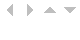

In [8]:
hack_source=get_page_source(url)
hack_source

In [9]:
hackathon_soup = BeautifulSoup(hack_source,'html.parser')
details = hackathon_soup.find_all('div', {'class':'hackathon-tile'})
details

[<div class="hackathon-tile clearfix open mb-5" data-v-19f1e237="" data-v-4adf7063=""><!-- --><a class="flex-row tile-anchor" data-v-19f1e237="" href="https://googlemapsplatform.devpost.com/?ref_feature=challenge&amp;ref_medium=discover"><div class="main-content" data-v-19f1e237=""><img class="hackathon-thumbnail" data-v-19f1e237="" src="//d112y698adiu2z.cloudfront.net/photos/production/challenge_thumbnails/002/213/034/datas/medium.png"/><div class="content" data-v-19f1e237=""><h3 class="mb-4" data-v-19f1e237="">Google Maps Platform Hackathon</h3><div class="flex-row justify-content-start mb-6" data-v-19f1e237=""><div class="hackathon-status mr-4" data-v-19f1e237=""><div class="round label status-label mr-4 open" data-v-19f1e237="">7 days left</div></div><div data-v-19f1e237=""><div data-v-19f1e237=""><div class="info-with-icon"><i aria-hidden="true" class="fas fa-globe"></i><div class="info"><span>Online</span></div></div></div></div></div><div class="flex-row justify-content-start al

In [47]:
names = [h3.text.strip() for h3 in hackathon_soup.select('h3')]
hosts = [span.text.strip() for span in hackathon_soup.select('span.host-label')]
prizes = [span.text.split() for span in hackathon_soup.select('span.prize-amount')]
themes = [span.text.split() for span in hackathon_soup.select('div.themes')]
submission_period =[span.text for span in hackathon_soup.select('div.submission-period')]
days_left = [div.text for div in hackathon_soup.select('div.status-label')]

In [75]:
hackathon_df = pd.DataFrame(list(zip(names,hosts,prizes, themes, submission_period,days_left)), columns=['Name','Host','Prize','Themes','Submission_Period','Days_Left'])
hackathon_df[:25]

,Name,Host,Prize,Themes,Submission_Period,Days_Left
0,Google Maps Platform Hackathon,Google Inc,"[$24,000]","[Mobile, Web, Low/No, Code]","Sep 07 - Nov 14, 2022",7 days left
1,NEAR MetaBUILD III Hackathon,NEAR Protocol,"[$1,000,000]","[Blockchain, Web]","Sep 23 - Nov 21, 2022",14 days left
2,Zero-Knowledge Proof Hackathon,Bitcoin Association,"[$45,000]",[Blockchain],"Nov 02 - Dec 02, 2022",25 days left
3,TRON Grand Hackathon - Season 3,TRON DAO,"[$1,200,000]","[Blockchain, Open, Ended, Web]","Sep 20 - Nov 14, 2022",7 days left
4,Chainlink Fall 2022 Hackathon,Chainlink Labs,"[$525,500]","[Blockchain, Fintech, Web]","Oct 19 - Nov 18, 2022",10 days left
5,AWS Data Exchange for APIs Challenge,Amazon,"[$35,000]","[Machine, Learning/AI, Mobile, Web]","Oct 10 - Nov 21, 2022",14 days left
6,Web3 Stack Hack,computecoin,"[$15,000]","[Blockchain, Web, DevOps]","Oct 21 - Dec 05, 2022",28 days left
7,Microsoft #BuildFor2030 Hackathon,Microsoft,"[$60,000]","[Social, Good, Enterprise, Open, Ended]","Sep 22 - Nov 18, 2022",10 days left
8,XRPL Hackathon: NFT Launch Party,Ripple,"[$50,000]","[Blockchain, Beginner, Friendly, Low/No, Code]","Nov 07 - Dec 12, 2022",about 1 month left
9,Slimplicity: Slim.AI Hackathon,Slim.AI,"[$5,000]","[Cybersecurity, DevOps, Web]","Oct 24 - Dec 05, 2022",28 days left


In [76]:
hackathon_pd = pd.DataFrame(zip(names,hosts,prizes,themes,submission_period,days_left), columns=['Name', 'Host','Prize','Themes','Submission period','Days left'])
hackathon_pd                          

TypeError: data argument can't be an iterator

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [2]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [5]:
#your code
from bs4 import BeautifulSoup
import requests
import time
import selenium
import warnings
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import numpy as np

In [3]:
def get_page_source(handle):
    options=webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    driver=webdriver.Chrome('../../../chromedriver', options=options)
    driver.get('https://twitter.com/'+handle)
    time.sleep(np.random.randint(7,high=10))
    ActionChains(driver).send_keys(Keys.END).perform() 
    time.sleep(np.random.randint(3,high=5)) 
    ActionChains(driver).send_keys(Keys.END).perform()
    page_source=driver.page_source
    driver.quit() 
    return page_source

def get_number_of_tweets(source):
    try: 
        soup=BeautifulSoup(source,'html.parser')
        tweet_count_div = soup.find('div', {'class':'r-1cwl3u0'})
        tweet_count = tweet_count_div.text.replace("\xa0"," ")
        if tweet_count[0].isdigit():
            return f'{tweet_count}'
        else:
            return f"The account {handle} doesn't exist"
    except:
        print("Nothing found")

In [8]:
handle = input('Input your account name on Twitter: ')
get_number_of_tweets(get_page_source(handle))

Input your account name on Twitter: zandee_hdz


'10,7 mil Tweets'

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [136]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [8]:
#your code
def get_number_followers(source):
    soup=BeautifulSoup(source,'html.parser')
    hrefs=soup.select("a[href*=/followers] .r-poiln3")
    if len(hrefs)>0:
        followersnum = [span.text for span in hrefs]
        return f"{followersnum[0]} followers"
    else:
        return f"The account {handle} doesn't exist"

In [10]:
handle = input('Input your account name on Twitter: ')
get_number_followers(get_page_source(handle))

Input your account name on Twitter: hbby844


"The account hbby844 doesn't exist"

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [2]:
#your code
#Ran on collab
[['English', '6,458,000+ articles'],
 ['日本語', '1,314,000+ 記事'],
 ['Español', '1,755,000+ artículos'],
 ['Русский', '1,798,000+ статей'],
 ['Français', '2,400,000+ articles'],
 ['Deutsch', '2,667,000+ Artikel'],
 ['Italiano', '1,742,000+ voci'],
 ['中文', '1,256,000+ 条目 / 條目'],
 ['Português', '1,085,000+ artigos'],
 ['العربية', '1,159,000+ مقالة']]

[['English', '6,458,000+ articles'],
 ['日本語', '1,314,000+ 記事'],
 ['Español', '1,755,000+ artículos'],
 ['Русский', '1,798,000+ статей'],
 ['Français', '2,400,000+ articles'],
 ['Deutsch', '2,667,000+ Artikel'],
 ['Italiano', '1,742,000+ voci'],
 ['中文', '1,256,000+ 条目 / 條目'],
 ['Português', '1,085,000+ artigos'],
 ['العربية', '1,159,000+ مقالة']]

#### A list with the different kind of datasets available in data.gov.uk 

In [3]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [13]:
#your code 
#request, soup, table
db_uk = requests.get(url,'html')
db_soup = BeautifulSoup(db_uk.text,'html.parser')
db_list = db_soup.find_all('h3', class_='dgu-topics__heading')
db_themes = [h3.text for h3 in db_soup.select('h3.dgu-topics__heading')]
db_themes

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [14]:
#your code
#Ran on collab
[['English', '6,458,000+ articles'],
 ['日本語', '1,314,000+ 記事'],
 ['Español', '1,755,000+ artículos'],
 ['Русский', '1,798,000+ статей'],
 ['Français', '2,400,000+ articles'],
 ['Deutsch', '2,667,000+ Artikel'],
 ['Italiano', '1,742,000+ voci'],
 ['中文', '1,256,000+ 条目 / 條目'],
 ['Português', '1,085,000+ artigos'],
 ['العربية', '1,159,000+ مقالة']]

[['English', '6,458,000+ articles'],
 ['日本語', '1,314,000+ 記事'],
 ['Español', '1,755,000+ artículos'],
 ['Русский', '1,798,000+ статей'],
 ['Français', '2,400,000+ articles'],
 ['Deutsch', '2,667,000+ Artikel'],
 ['Italiano', '1,742,000+ voci'],
 ['中文', '1,256,000+ 条目 / 條目'],
 ['Português', '1,085,000+ artigos'],
 ['العربية', '1,159,000+ مقالة']]

### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code